In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8")) #check the files available in the directory

In [3]:
train=pd.read_csv('input/train.csv')
test=pd.read_csv('input/test.csv')

In [7]:
train_id=train['Id']
test_id=test['Id']
# inplace=Trueにすれば変更を元のデータに反映させることが可能
train.drop("Id",axis=1,inplace=True)
test.drop("Id",axis=1,inplace=True)

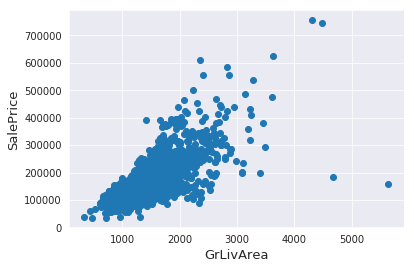

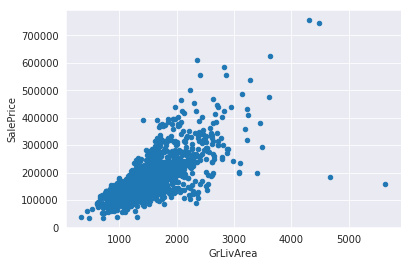

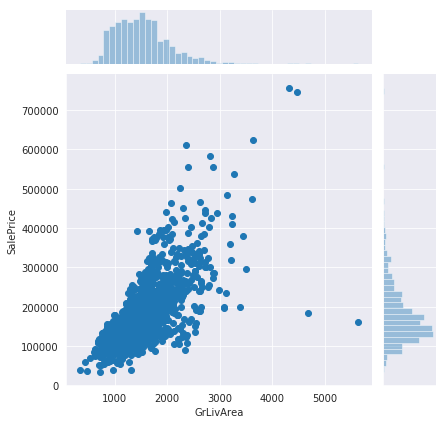

In [13]:
# pyplotでの散布図表示
fig,ax=plt.subplots()
ax.scatter(x=train['GrLivArea'],y=train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

# pandasのグラフ表示
data=pd.concat([train['GrLivArea'],train['SalePrice']],axis=1)
data.plot.scatter(x='GrLivArea',y='SalePrice')

# seabornのグラフ表示 seabornはmatplotlibのラッパー的存在
sns.jointplot(x='GrLivArea',y='SalePrice',data=data)

In [15]:
train=train.drop(train[(train['GrLivArea']>4000) &(train['SalePrice']<300000)].index)

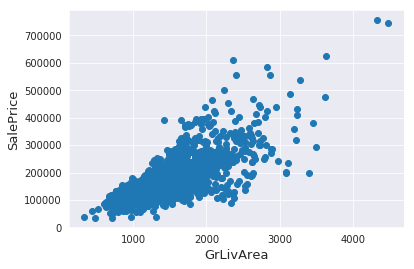

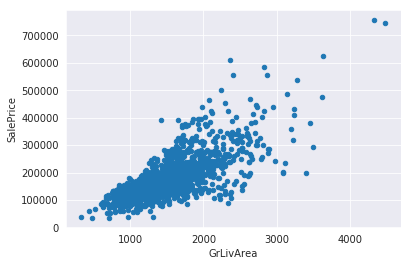

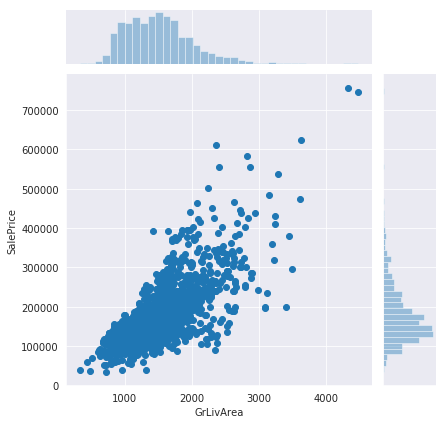

In [17]:
fig,ax=plt.subplots()

ax.scatter(x=train['GrLivArea'],y=train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

# pandasのグラフ表示
data=pd.concat([train['GrLivArea'],train['SalePrice']],axis=1)
data.plot.scatter(x='GrLivArea',y='SalePrice')

# seabornのグラフ表示 seabornはmatplotlibのラッパー的存在
sns.jointplot(x='GrLivArea',y='SalePrice',data=data)



 mu = 180932.92 and sigma = 79467.79



Text(0.5, 1.0, 'SalePrice distribution')

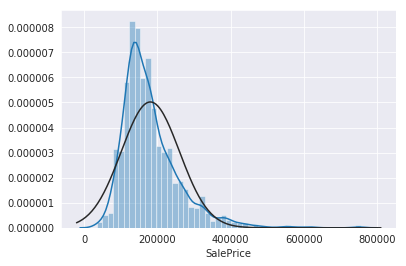

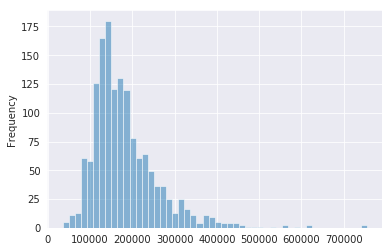

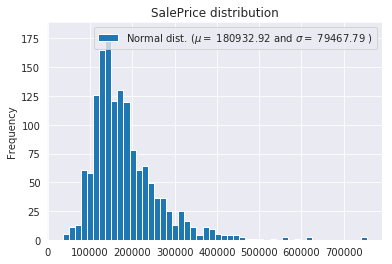

In [28]:
# seaborn でhistgram
sns.distplot(train['SalePrice'],fit=norm)

fig,ax=plt.subplots()
# pandas でhistgram
train['SalePrice'].plot.hist(bins=50,alpha=0.5)

# matplotlibでhistgram
fig,ax=plt.subplots()
plt.hist(train['SalePrice'],bins=50)

(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

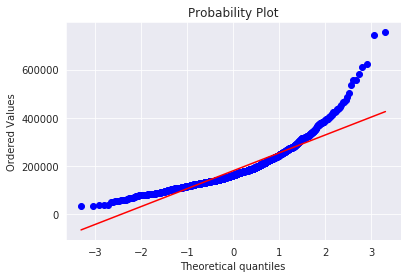

In [30]:
# 確率プロット である　QQプロットを一発でかけるのはscipy のみ
fig,ax=plt.subplots()
res=stats.probplot(train['SalePrice'],plot=plt)
plt.show()

In [31]:
train['SalePrice']=np.log1p(train['SalePrice'])


 mu = 12.02 and sigma = 0.40



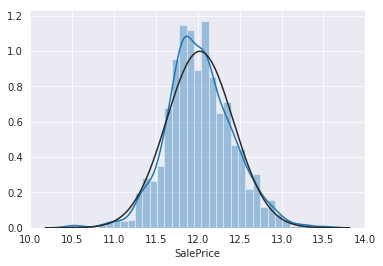

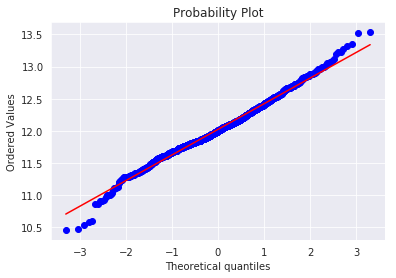

In [32]:
sns.distplot(train['SalePrice'],fit=norm)
mu,sigma=norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

fig=plt.figure()
res=stats.probplot(train['SalePrice'],plot=plt)

In [35]:
# 正解ラベルを取得、データを取得するにはvaluesを使う
y_train=train.SalePrice.values
#train['SalePrice'].values

all_data=pd.concat([train,test]).reset_index(drop=True)
all_data.drop(['SalePrice'],axis=1,inplace=True)

In [44]:
all_data_na=(all_data.isnull().sum()/len(all_data))*100
all_data_na=all_data_na.drop(all_data_na[all_data_na==0].index).sort_values(ascending=False)
all_data_na[:30]

PoolQC         99.691
MiscFeature    96.400
Alley          93.212
Fence          80.425
FireplaceQu    48.680
LotFrontage    16.661
GarageQual      5.451
GarageCond      5.451
GarageFinish    5.451
GarageYrBlt     5.451
GarageType      5.382
BsmtExposure    2.811
BsmtCond        2.811
BsmtQual        2.777
BsmtFinType2    2.743
BsmtFinType1    2.708
MasVnrType      0.823
MasVnrArea      0.788
MSZoning        0.137
BsmtFullBath    0.069
BsmtHalfBath    0.069
Utilities       0.069
Functional      0.069
Electrical      0.034
BsmtUnfSF       0.034
Exterior1st     0.034
Exterior2nd     0.034
TotalBsmtSF     0.034
GarageArea      0.034
GarageCars      0.034
dtype: float64

<BarContainer object of 34 artists>

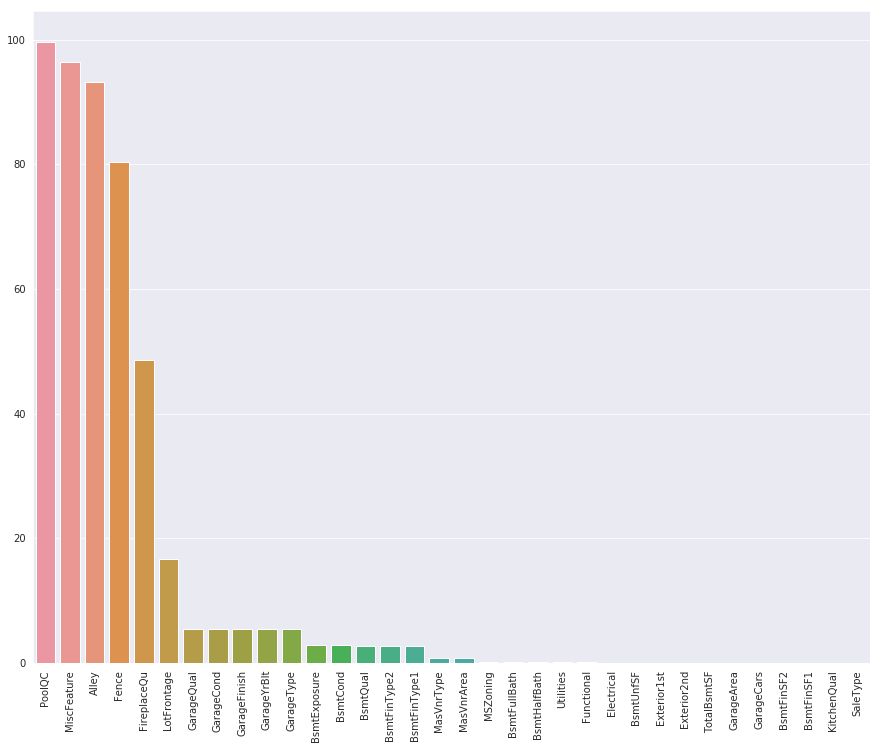

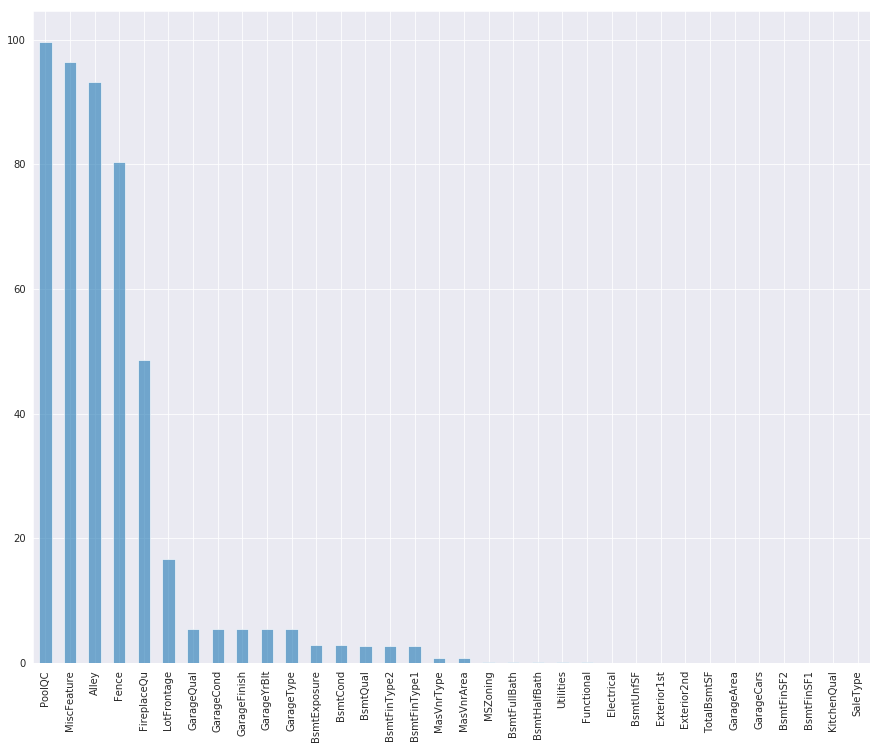

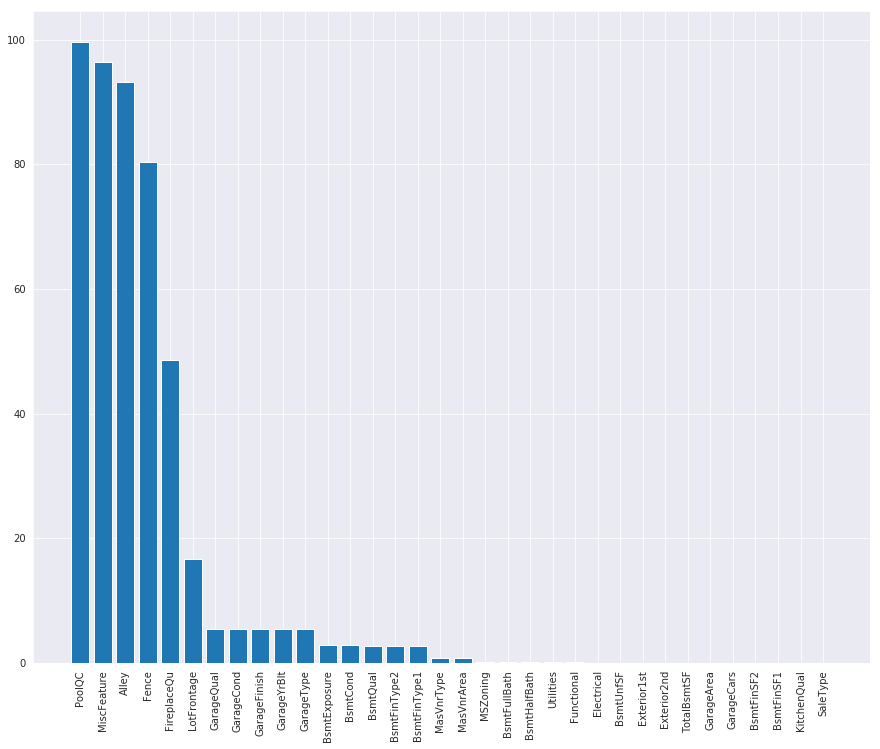

In [51]:
# seaborn　で棒グラフ
fig,ax=plt.subplots(figsize=(15,12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index,y=all_data_na)


# pandas　で棒グラフ
fig,ax=plt.subplots(figsize=(15,12))
plt.xticks(rotation='90')
all_data_na.plot.bar(alpha=0.6)

# matpltlibで棒グラフ
fig,ax=plt.subplots(figsize=(15,12))
plt.xticks(rotation='90')
plt.bar(all_data_na.index,height=all_data_na)

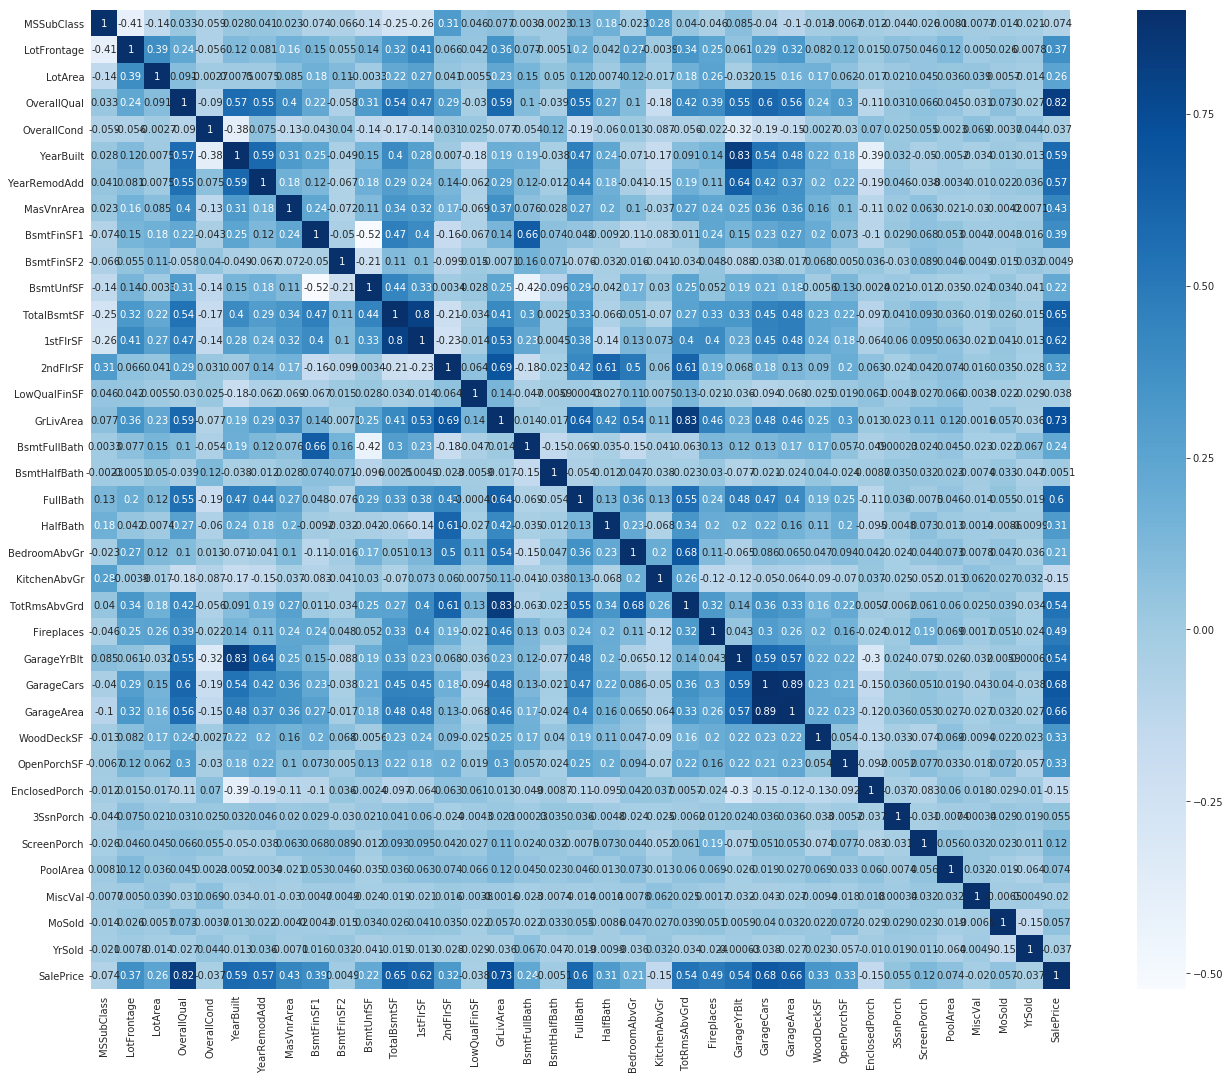

In [65]:
# pandasによる相関係数の導出
# .corr()の場合、文字列があっても相関係数を求められる。np.corrcoef,stats.pearsonrは数字でないとエラーされる
corrmat=train.corr()
corrmat

# numpy　による相関係数の導出
#corrmat_np=np.corrcoef(train)
#corrmat_np
# scipyによる相関係数の導出
#corrmat_sci=stats.pearsonr(train,train)
#corrmat_sci
fig,ax=plt.subplots(figsize=(24,18))
# Seaborn でのグラフの返り値はMatplotlibのAxesSubplotオブジェクト
sns.heatmap(corrmat,vmax=0.9,square=True,annot=True,cmap='Blues')

In [91]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

# 中央値を欠損値に入れる groupbyでneghborhoodごとの中央値を取っている
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
    
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
    
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

all_data = all_data.drop(['Utilities'], axis=1)


In [92]:
train.groupby("Neighborhood").groups

{'Blmngtn': Int64Index([ 219,  229,  385,  443,  465,  559,  597,  639,  790,  851,  982,
             1004, 1019, 1023, 1126, 1394, 1415],
            dtype='int64'),
 'Blueste': Int64Index([599, 956], dtype='int64'),
 'BrDale': Int64Index([ 225,  227,  232,  235,  363,  430,  432,  500,  655,  837, 1029,
             1104, 1219, 1291, 1334, 1378],
            dtype='int64'),
 'BrkSide': Int64Index([   9,   15,   29,   51,   77,  146,  149,  184,  250,  275,  289,
              328,  345,  361,  393,  437,  442,  459,  497,  522,  531,  533,
              546,  555,  584,  586,  589,  636,  694,  696,  710,  713,  761,
              807,  826,  912,  935,  960,  974,  976,  995, 1098, 1135, 1139,
             1145, 1202, 1218, 1255, 1263, 1285, 1321, 1323, 1352, 1389, 1397,
             1400, 1414, 1443],
            dtype='int64'),
 'ClearCr': Int64Index([  69,  120,  153,  166,  176,  249,  271,  279,  351,  358,  371,
              384,  451,  457,  588,  682,  706,  789,  800,  81

In [93]:
print(all_data['Functional'].describe())
all_data["Functional"] = all_data["Functional"].fillna("Typ")

count     2917
unique       7
top        Typ
freq      2717
Name: Functional, dtype: object


In [94]:
print(all_data['Electrical'].describe())
# mode()で最頻出を取得
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

count      2917
unique        5
top       SBrkr
freq       2670
Name: Electrical, dtype: object


In [95]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [106]:
# .apply で関数を適用する
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

# .astype でデータ型を変える
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [112]:
from sklearn.preprocessing import LabelEncoder
pd.options.display.max_columns = None
all_data.info()
# 特定のデータ型のみ取り出しselect_dtypes
all_data.select_dtypes(include=object)

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for c in cols:
    lbl=LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c]=lbl.transform(list(all_data[c].values))
print('Shape all_data: {}'.format(all_data.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 78 columns):
1stFlrSF         2917 non-null int64
2ndFlrSF         2917 non-null int64
3SsnPorch        2917 non-null int64
Alley            2917 non-null object
BedroomAbvGr     2917 non-null int64
BldgType         2917 non-null object
BsmtCond         2917 non-null object
BsmtExposure     2917 non-null object
BsmtFinSF1       2917 non-null float64
BsmtFinSF2       2917 non-null float64
BsmtFinType1     2917 non-null object
BsmtFinType2     2917 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2917 non-null object
BsmtUnfSF        2917 non-null float64
CentralAir       2917 non-null object
Condition1       2917 non-null object
Condition2       2917 non-null object
Electrical       2917 non-null object
EnclosedPorch    2917 non-null int64
ExterCond        2917 non-null object
ExterQual        2917 non-null object
Exterior1st      29

In [119]:
# 新しい特徴量を定義
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

# 数字の特徴量のカラムを取得
numeric_feats=all_data.dtypes[all_data.dtypes != 'object'].index

# 歪度を取得
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.940
PoolArea,17.689
LotArea,13.109
LowQualFinSF,12.085
3SsnPorch,11.372
LandSlope,4.973
KitchenAbvGr,4.301
BsmtFinSF2,4.145
EnclosedPorch,4.002
ScreenPorch,3.945


In [120]:
skewness=skewness[abs(skewness)>0.75]
from scipy.special import boxcox1p

skewed_features=skewness.index
lam=0.15

for feat in skewed_features:
    all_data[feat]=boxcox1p(all_data[feat],lam)
    

In [123]:
all_data=pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)
